# 1 year atlas close look (let's look at 2022)

In [669]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import image
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, FFMpegWriter
import warnings
warnings.filterwarnings("ignore")


In [670]:


def compass(r,T,s):
    return r*np.exp(1j*2*np.pi*s/T)

def init_atlas(sx,sy):
    
    plt.figure(figsize=(sx,sy))



def see_atlas(atlas,symbol_size,symbol_shape):
    #plt.scatter(0,0,s=10,marker='*')
    plt.scatter(atlas.real,atlas.imag,s=symbol_size,marker=symbol_shape)


def color_atlas(atlas,symbol_size,symbol_shape,symbol_color,cmap,T_color):
    
    get_color =  cm.get_cmap(cmap, T_color)
    plt.scatter(atlas.real,atlas.imag,s=symbol_size,marker=symbol_shape,color=get_color(symbol_color%T_color))

def atlas_view(symbol,T_symbol,atlas,symbol_size,symbol_shape,symbol_color,cmap,T_color,char_flag,T_char,char_color,char_size,cmap_char):
    
    get_color =  cm.get_cmap(cmap, T_color)
    get_char_color = cm.get_cmap(cmap_char, T_char)
    plt.scatter(atlas.real,atlas.imag,s=symbol_size,marker=symbol_shape,color=get_color(symbol_color%T_color))
    if char_flag:
        plt.text(atlas.real,atlas.imag,str(symbol%T_symbol),size=char_size,color=get_char_color(char_color%T_symbol))


def create_random_climate_data(start,end,freq):
    dt_index = pd.date_range(start=start, end=end, freq=freq)

    # Create a dataframe with random temperature, humidity, and pressure data
    
    data = {'temperature': np.random.uniform(low=-60, high=60, size=len(dt_index)),
        'humidity': np.random.uniform(low=20, high=80, size=len(dt_index)),
        'pressure': np.random.uniform(low=980, high=1020, size=len(dt_index))}
        
    climate_data = pd.DataFrame(data=data, index=dt_index)
    
    return climate_data

    
def extract_climate_data(df):
    # Extract the datetime components as numpy arrays
    year = df.index.year.values
    month = df.index.month.values
    day = df.index.day.values
    hour = df.index.hour.values
    minute = df.index.minute.values
    second = df.index.second.values

    # Extract the data columns as numpy arrays
    temperature = df['temperature'].values
    humidity = df['humidity'].values
    pressure = df['pressure'].values
    
    return year, month, day, hour, minute, second, temperature, humidity, pressure

def month_range(year, month):
    if month == 2 and calendar.isleap(year):
        return 29
    return calendar.monthrange(year, month)[1]


def compass_signed(r,T_pos,T_neg,s):
    # if s will have negative values: 
    #       positive values will range from [0,pi-
    #       negative values will range from [-pi,]

   return r*np.exp(1j*(np.pi/T_pos)*s) 

def get_colors(symbol,cmap):
    
    markers = ['o' if t >= 0 else 'd' for t in symbol]
    norm = plt.Normalize(min(symbol), max(symbol))
    colors = [cmap(norm(value)) for value in symbol]
    norm_seq =norm(symbol)
    sizes=10+7*np.abs(symbol)
    return  markers,norm,colors,norm_seq,sizes

def plot_atlas(atlas,symbol,cmap,alpha,sx,sy,legend_flag):
    markers,norm,colors,norm_seq,sizes=get_colors(symbol,cmap)
    sizes=10+7*np.abs(symbol)
    init_atlas(sx,sy)
    for i in range(len(atlas)):
        plt.scatter(atlas[i].real, atlas[i].imag, color=colors[i], s=sizes[i], marker=markers[i], facecolor=colors[i], edgecolors='black', alpha=alpha)
    if legend_flag:
        cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))

In [671]:
def generate_primes(n):
    primes = []
    sieve = [True] * (n+1)
    p = 2
    while p * p <= n:
        if sieve[p]:
            for i in range(p * p, n+1, p):
                sieve[i] = False
        p += 1
    for p in range(2, n+1):
        if sieve[p]:
            primes.append(p)
    return primes


def is_prime(numbers):
    if isinstance(numbers, int):
        numbers = [numbers]
    elif isinstance(numbers, list):
        numbers = numbers.copy()
    else:
        raise ValueError("Input must be an integer or a list of integers.")

    primes = generate_primes(max(numbers))
    result = []
    for num in numbers:
        if num in primes:
            result.append(1)
        else:
            result.append(0)
    if len(result) == 1:
        return result[0]
    else:
        return result


In [672]:
primes=generate_primes(24)
primes

[2, 3, 5, 7, 11, 13, 17, 19, 23]

In [673]:
is_prime(4)

0

In [674]:

plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "white",
        "text.color": "white",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "gray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})




In [675]:

# Example use
start = pd.Timestamp('2023-01-01 00:00:00')
end = pd.Timestamp('2023-01-31 23:00:00')
freq ='H'
df  = create_random_climate_data(start,end,freq)
year, month, day, hour, minute, second, temperature, humidity, pressure = extract_climate_data(df)

# Main index
n = np.arange(len(df.index))
h    = n
h_24 = hour
d    = day
m    = month
y    = year

# Structural index
year_clk    =   compass(r=(2)**(0),T=7,s=year)
month_clk   =   compass(r=(2)**(-2.3),T=12,s=month)
day_clk     =   compass(r=(2)**(-4.5),T=31,s=day)
hour_clk    =   compass(r=(2)**(-8),T=24,s=n)

#temp_symbol =   compass(r=1,T=)

smaller_clock = hour_clk
clk_0   =   smaller_clock
clk_1   =   day_clk
clk_2   =   month_clk
clk_3   =   year_clk


atlas = clk_0+clk_1+clk_2+clk_3



# Adapt the data to the time structure

Here are no general rules. You can use your compas however you like.
As we are testing with climate data, and with possitive and negative numbers we have to adapt our data to our clocks structure.

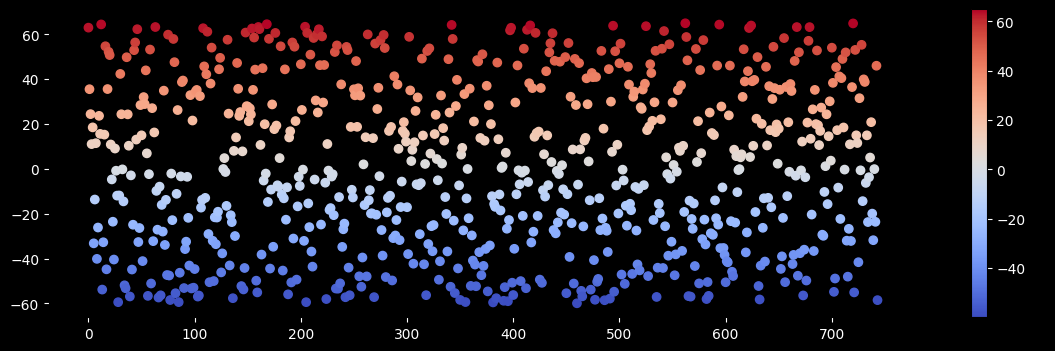

In [676]:
MAX=60
MIN=-60
K=3
n=n
seq_size=n.size
# symbol = np.arange(-60,61,0.5)
# symbol = np.random.randint(-60,61,300)
#symbol = np.random.rand(int(seq_size))*MAX + np.random.rand(seq_size)*MIN
symbol    = np.random.uniform(low=-60, high=65, size=seq_size)
cmap = plt.cm.coolwarm
norm = plt.Normalize(min(symbol), max(symbol))
colors = [cmap(norm(value)) for value in symbol]
init_atlas(14,4)

plt.scatter(np.arange(len(symbol)), symbol, color=colors)
#plt.plot(np.arange(len(symbol)), symbol)
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label('Color for Positive and Negative Values')

plt.show()

In [677]:
atlas.size

744

# The sine function in 1 month atlas

$$s = r_s*\sin(\frac{2\pi}{24}n) $$

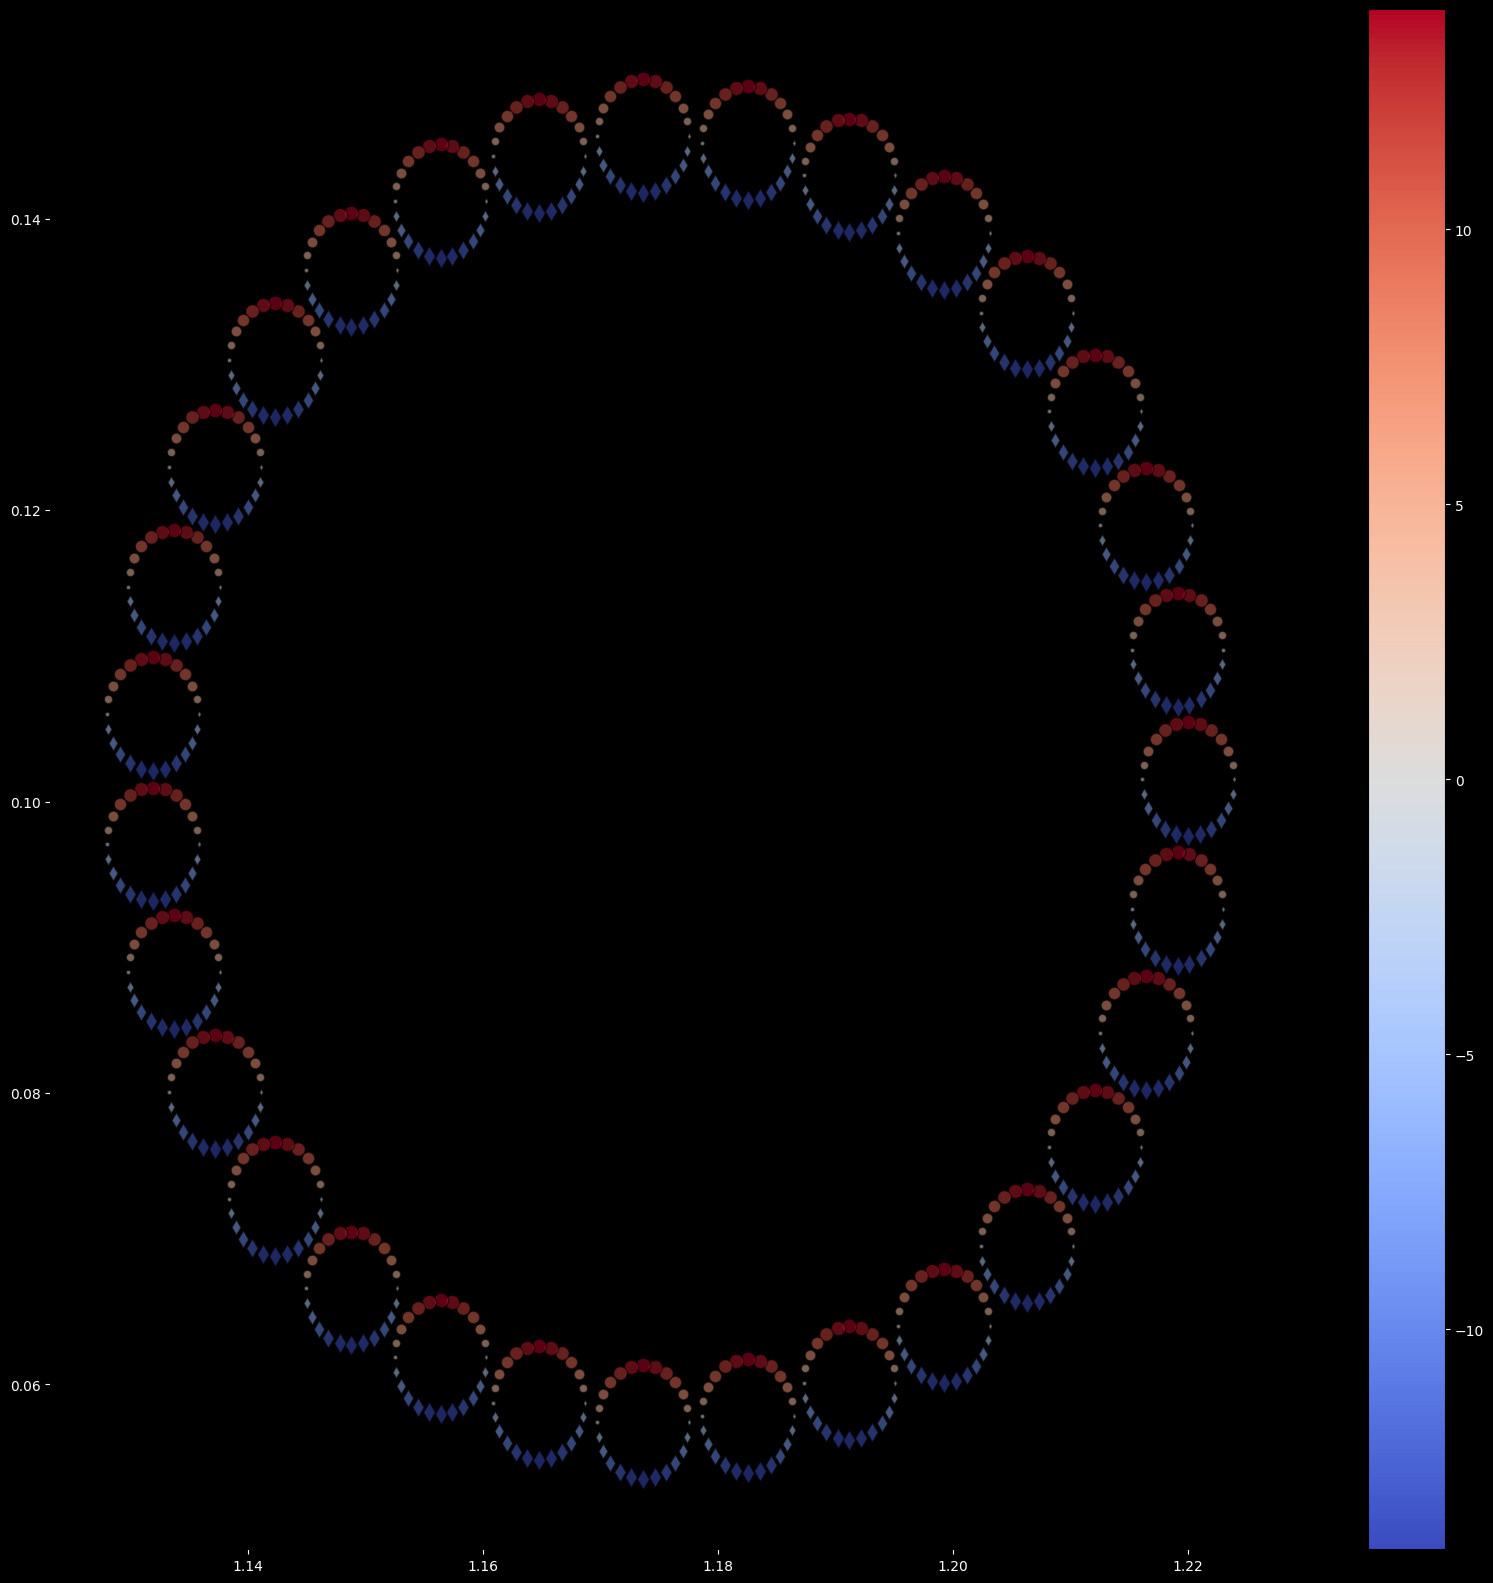

In [678]:
symbol    =14*np.sin(2*np.pi/24*np.arange(len(atlas)))
cmap=plt.cm.coolwarm
plot_atlas(atlas=atlas,symbol=symbol,cmap=cmap,alpha=0.5,sx=20,sy=20,legend_flag=1)

## Hour number 31 days

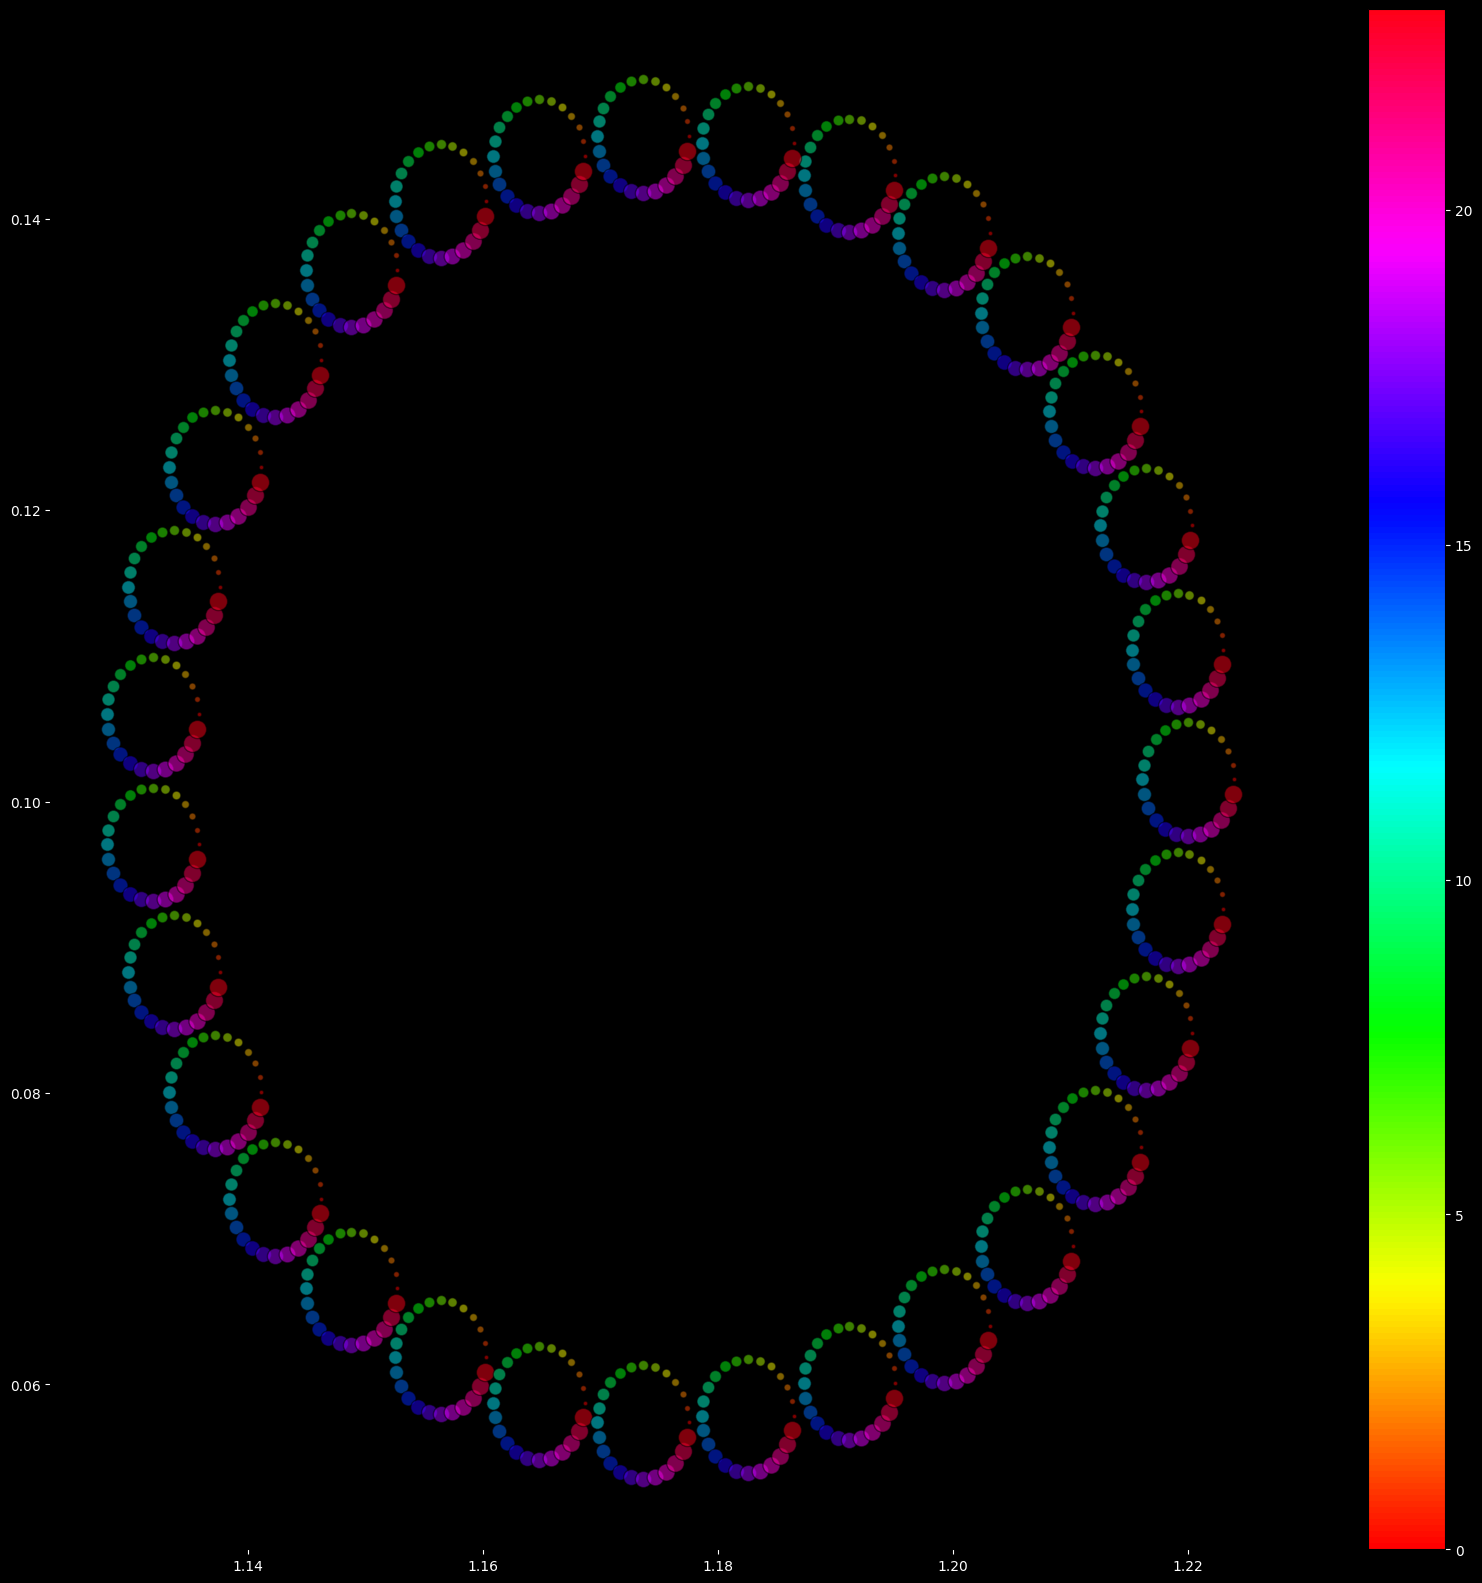

In [679]:
# Structural index
year_clk    =   compass(r=(2)**(0),T=7,s=year)
month_clk   =   compass(r=(2)**(-2.3),T=12,s=month)
day_clk     =   compass(r=(2)**(-4.5),T=31,s=day)
hour_clk    =   compass(r=(2)**(-8),T=24,s=n)

#temp_symbol =   compass(r=1,T=)

smaller_clock = hour_clk
clk_0   =   smaller_clock
clk_1   =   day_clk
clk_2   =   month_clk
clk_3   =   year_clk


atlas = clk_0+clk_1+clk_2+clk_3
plot_atlas(atlas=atlas,symbol=hour,cmap=plt.cm.hsv,alpha=0.5,sx=20,sy=20,legend_flag=1)

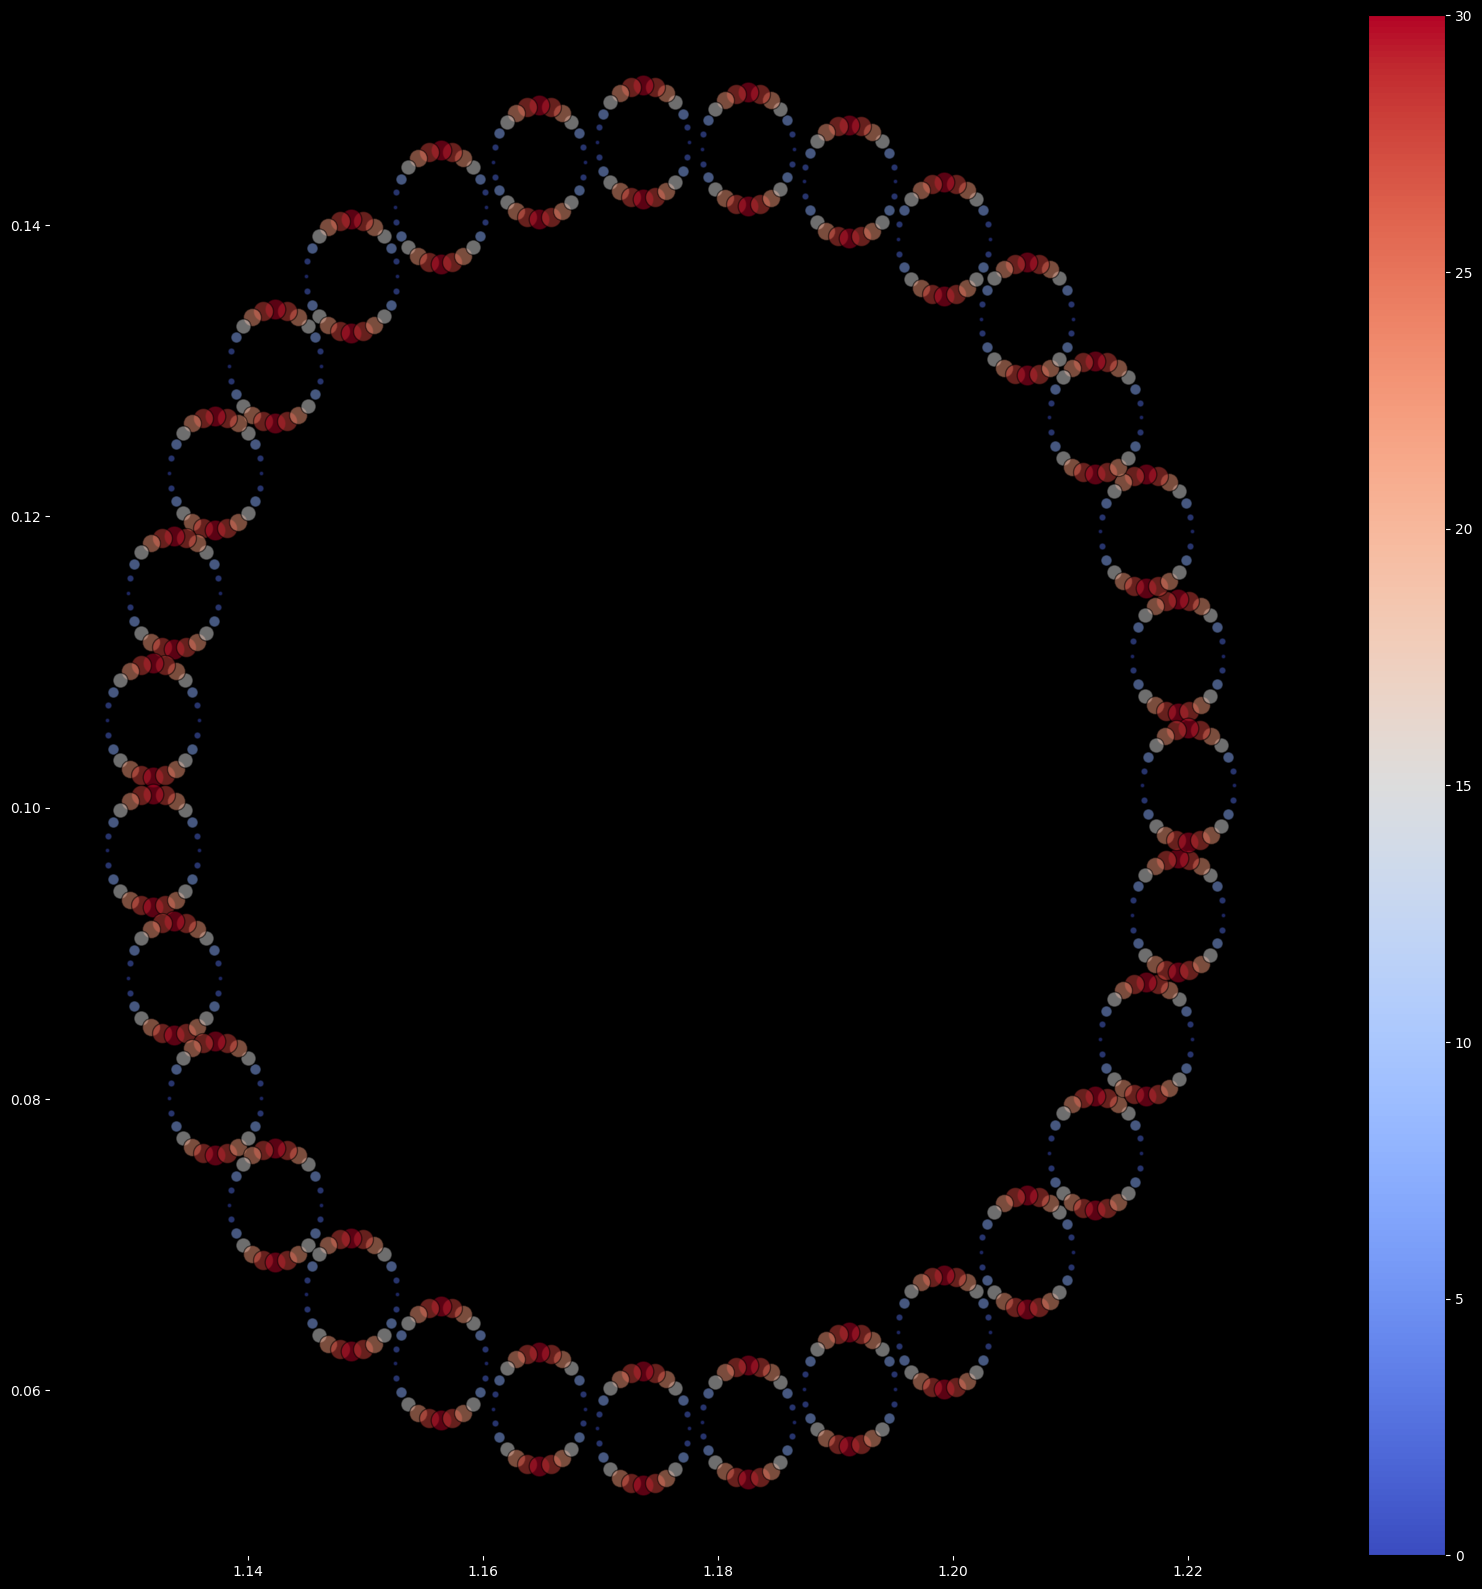

In [680]:
plot_atlas(atlas=atlas,symbol=30*np.sin(2*np.pi*hour/24)**2,cmap=plt.cm.coolwarm,alpha=0.5,sx=20,sy=20,legend_flag=1)

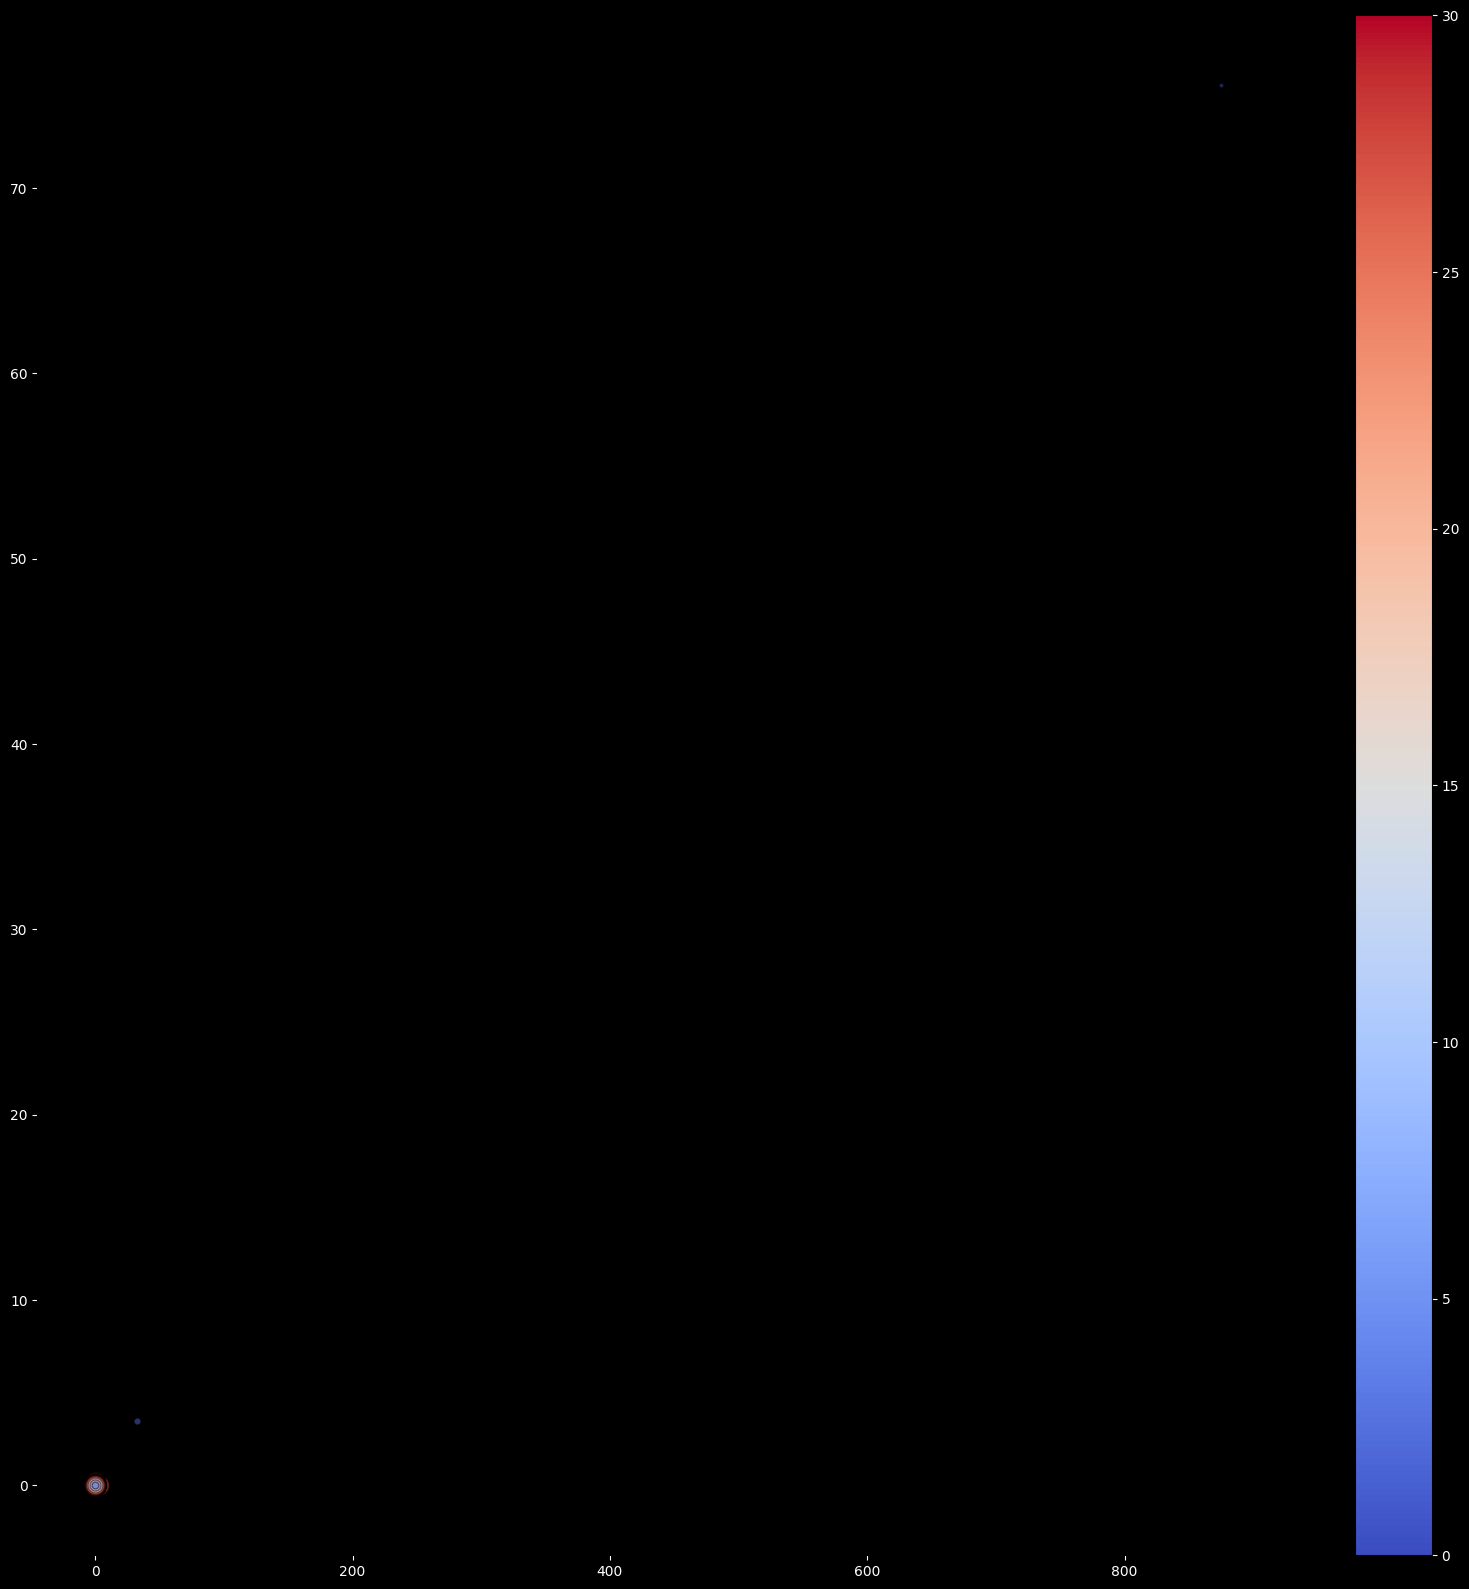

In [685]:
fft_result = np.fft.fft(atlas)
plot_atlas(atlas=fft_result,symbol=30*np.sin(2*np.pi*hour/24)**2,cmap=plt.cm.coolwarm,alpha=0.5,sx=20,sy=20,legend_flag=1)

## Random symbol

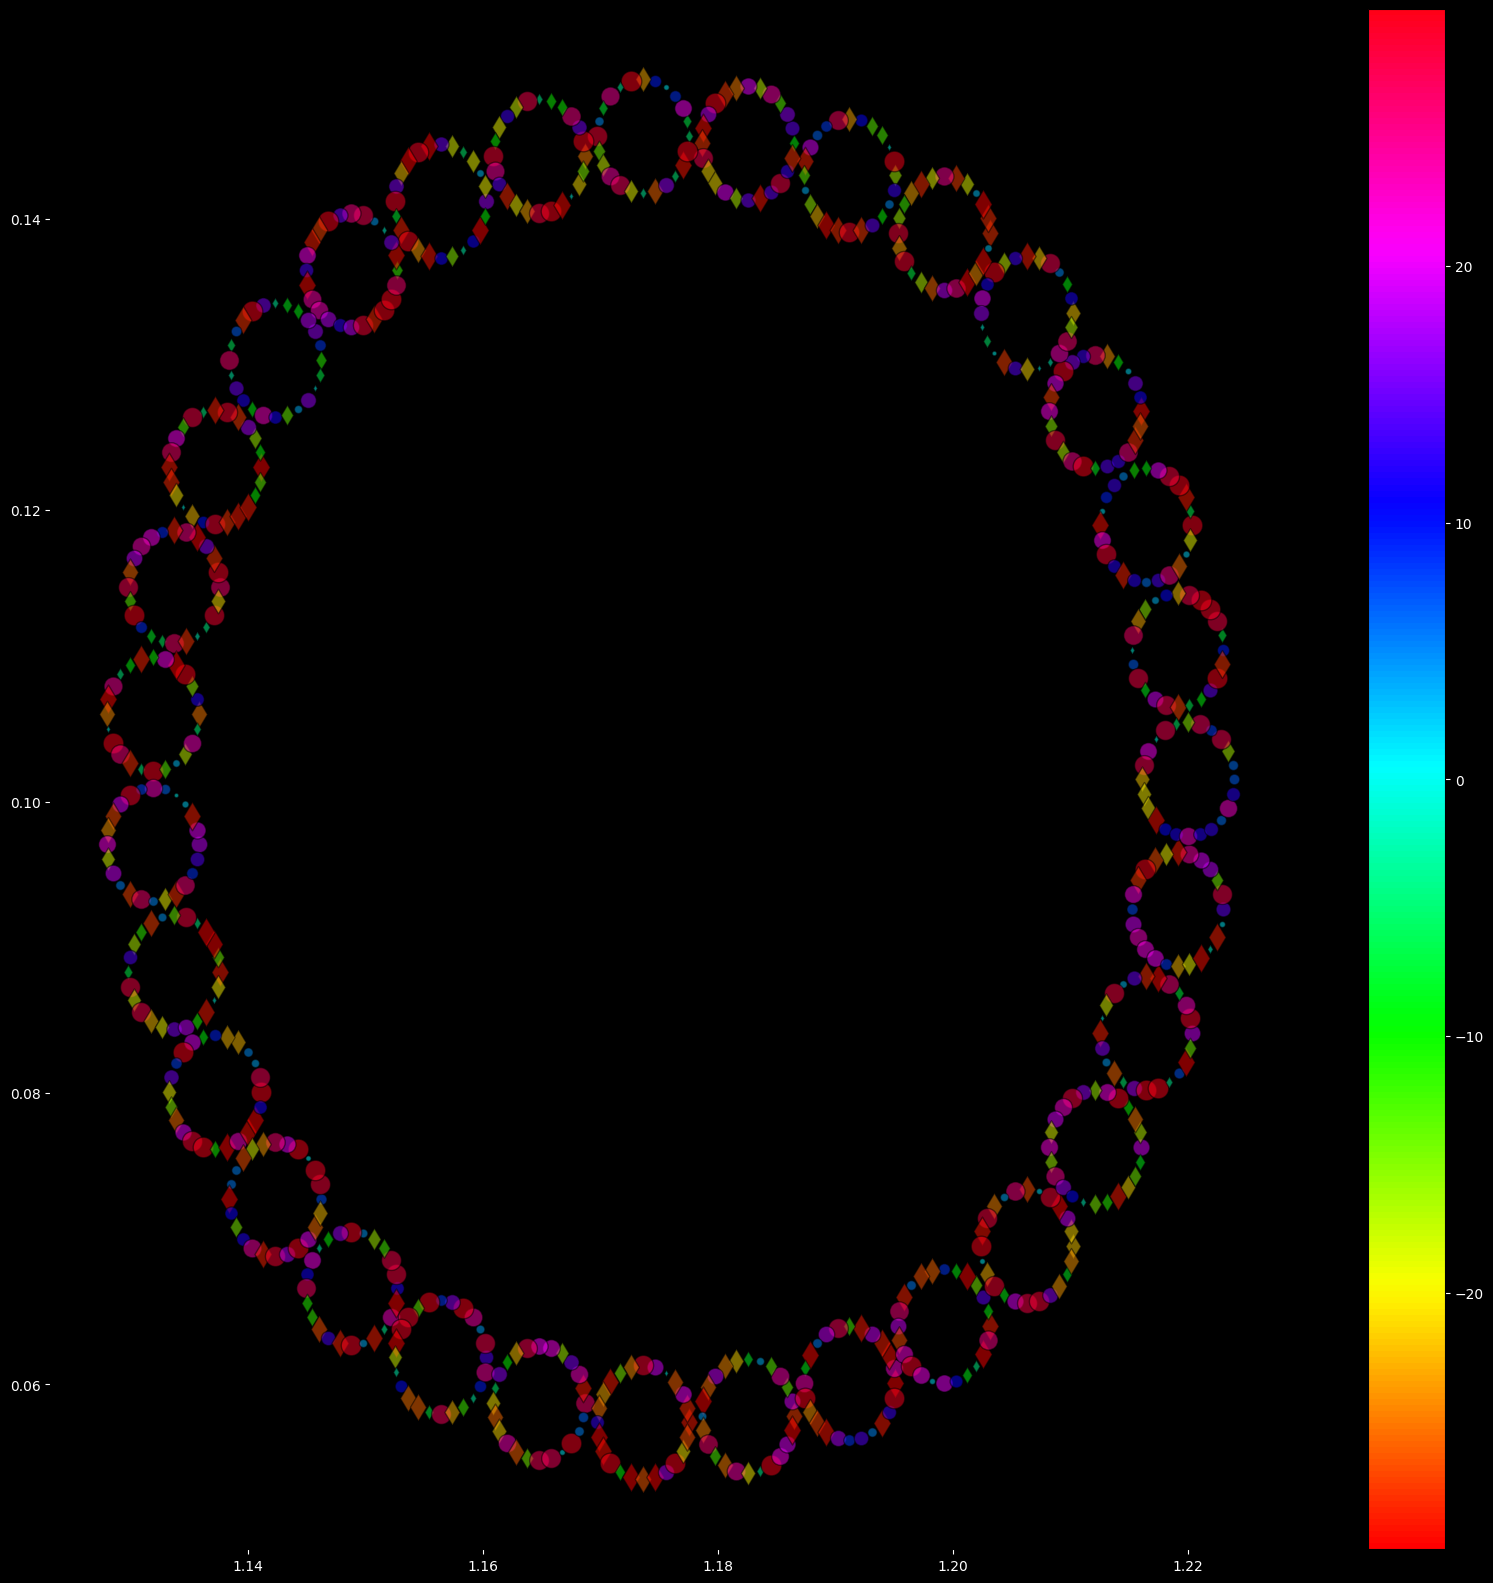

In [681]:

plot_atlas(atlas=atlas,symbol=30*np.sin(2*np.pi*temperature/60),cmap=plt.cm.hsv,alpha=0.5,sx=20,sy=20,legend_flag=1)


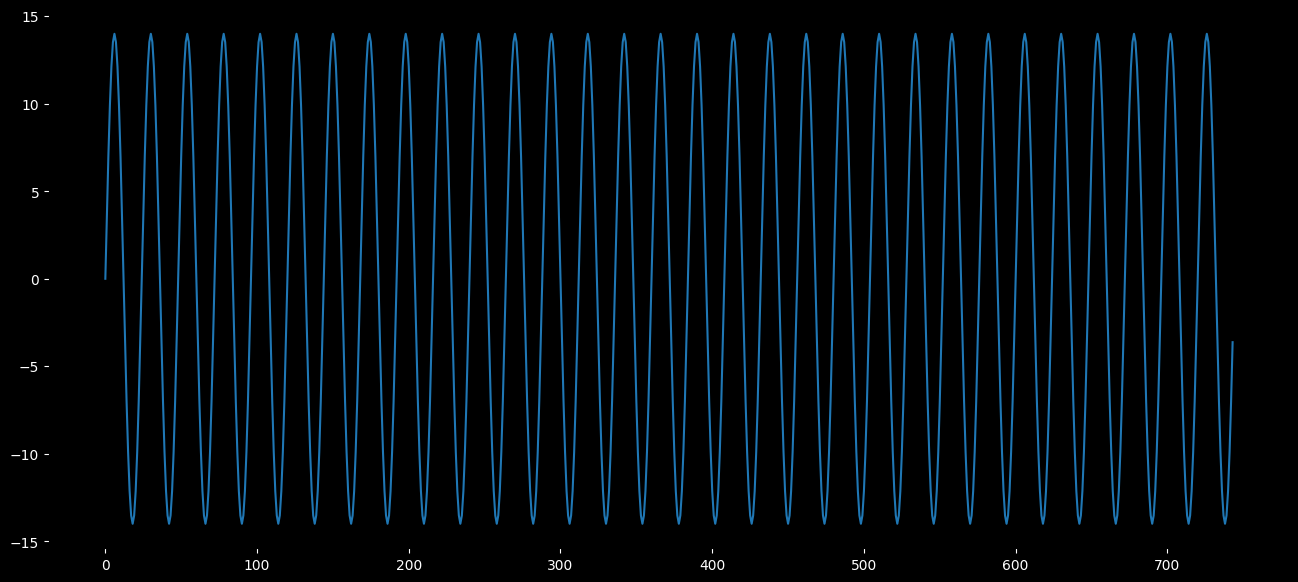

In [684]:
init_atlas(16,7)
plt.plot(symbol)

## Custom structure - a 360 days year simplification

If we didn't use the datetime structure from python, we could imagine we design our own calendar going from the most simple one to understand of one year of 360 days (to be 1 )

In [683]:
T_0=24
T_1=30
T_2=12
T_3=1
n=np.arange(T_0*T_1*T_2*T_3)
s_0=n
s_1=n%T_1
s_2=n%T_2
s_3=n%T_3
